In [10]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot as plt

from helpers import utils
import app.transform_eurostat as eurostat

In [11]:
file_path = utils.get_project_path('data', 'raw', 'eurostat', 'UK.csv')
df = (
    eurostat.read_datafile(file_path)
    .rename(columns={'UK': 'pax'})
    .sort_index()
)
df.sample(5)

INFO:app.transform_eurostat:Parsing UK


,pax
1993-09-01,NaN
2015-05-01,20791446.0
1996-03-01,NaN
2001-06-01,NaN
2011-04-01,16635915.0


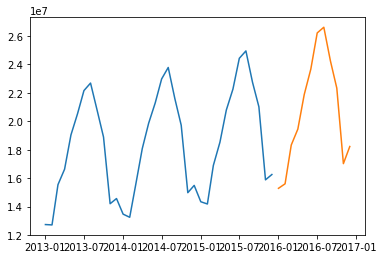

In [12]:
plt.plot(train.pax)
plt.plot(test.pax)
plt.show();

RMSE= 1417782.462
RMSE= 1933475.198


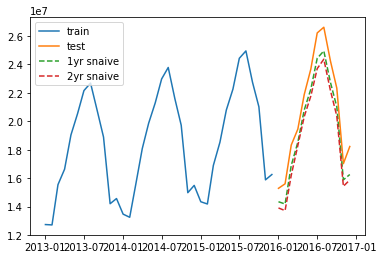

In [26]:
def evaluate_model(df):
    train = df.truncate(before='2013-01-01', after='2015-12-31')
    test = df.truncate(before='2016-01-01', after='2016-12-31')
    
    years = [1, 2]
    scores = list()
    predictions = dict()
    
    for year in years:
        # walk forward validation
        history = [x for x in train.pax]
        predictions[year] = list()
        for i in range(len(test)):
            # collect observations
            obs = list()
            for y in range(1, year+1):
                obs.append(history[-(y*12)])
            # make prediction
            yhat = np.mean(obs)
            predictions[year].append(yhat)
            # observation
            history.append(test.pax[i])
        # report performance
        rmse = sqrt(mean_squared_error(test, predictions[year]))
        scores.append(rmse)
        print('RMSE= %.3f' % rmse)
    plt.plot(train.pax, linestyle='solid', label='train')
    plt.plot(test.pax, linestyle='solid', label='test')
    plt.plot(test.index, predictions[1], linestyle='dashed', label='1yr snaive')
    plt.plot(test.index, predictions[2], linestyle='dashed', label='2yr snaive')
    plt.legend()
    plt.show();

evaluate_model(df)